In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year = int(input('Enter the year: '))
month = int(input('Enter the month from january till september (1-11) if you dont want to filter by month insert, 0: ')) 


Enter the year: 2017
Enter the month from january till september (1-11) if you dont want to filter by month insert, 0: 10


### Acquisition

In [3]:
def acquire():
    file = "./data/tenis_{}.csv".format(year)
    df = pd.read_csv(file)
    return df 

In [4]:
data = acquire()

### Wrangling

In [5]:
def wrangle(data): 
    data["tourney_date"] = pd.to_datetime(data.tourney_date.astype("str")) # le doy formato de fecha a tourney date
    data["tourney_month"] = data["tourney_date"].dt.month # creo una columna con el mes que figura en tourney date
    if month == 0:
        filtered = data
    else: 
        filtered = data[data["tourney_month"] == month] # Filtro el dataframe por el mes que me interesa
    return filtered

In [6]:
filtered = wrangle(data)

###  Analyze

In [102]:
def analize(filtered):
    grouped = filtered["winner_name"].value_counts().head(10) # cantidad de partidos ganados en el mes 

    """ media de partidos ganados al mes por jugador"""
    monthly_mean = round(data.groupby("winner_name")["winner_name"].count()/(len(set(data['tourney_month']))),1) 
    pd_grouped = (pd.DataFrame(grouped)).reset_index(level=0)
    pd_grouped = pd_grouped.rename(columns={"winner_name":"winned_matches","index":"winner_name"})
    df_mm = pd.DataFrame(monthly_mean)
    df_mm.index.names = ["winner"]
    df_mm = (df_mm.reset_index(level=0))
    df_mm = df_mm.rename(columns={"winner_name":"avg_winned_matches_per_month","winner":"winner_name"})
    df_merge = pd.merge(pd_grouped,df_mm,on="winner_name")
    return df_merge

df_merge = analize(filtered)

In [ ]:
### visualize 

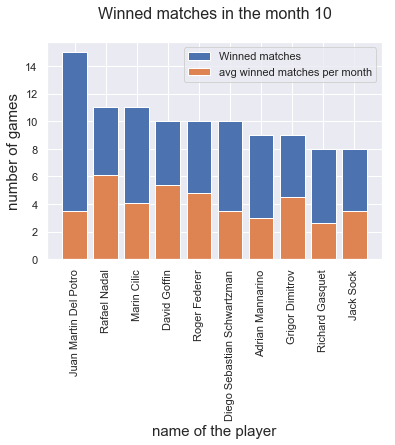

In [132]:
player = df_merge["winner_name"].head(10)
winned_matches = df_merge["winned_matches"].head(10)
avg_winned_matches = df_merge["avg_winned_matches_per_month"].head(10)
sns.set()
_ = plt.bar(player,winned_matches)
_ = plt.bar(player,avg_winned_matches)
_ = plt.xlabel("name of the player",fontsize=15)
_= plt.ylabel("number of games",fontsize=15)
_= plt.legend(labels=["Winned matches","Avg winned matches per month"])
_= plt.title("Winned matches in the month {}".format(month) + "\n", fontsize=16)

plt.xticks(rotation=90)
plt.show()